# Student Score Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [3]:
Student_Performance = pd.read_csv('StudentPerformanceFactors.csv')

In [4]:
Student_Performance

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Data Exploration

In [5]:
Student_Performance.info() #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
Student_Performance.isnull().any() #showing which columns contain missing values

Hours_Studied                 False
Attendance                    False
Parental_Involvement          False
Access_to_Resources           False
Extracurricular_Activities    False
Sleep_Hours                   False
Previous_Scores               False
Motivation_Level              False
Internet_Access               False
Tutoring_Sessions             False
Family_Income                 False
Teacher_Quality                True
School_Type                   False
Peer_Influence                False
Physical_Activity             False
Learning_Disabilities         False
Parental_Education_Level       True
Distance_from_Home             True
Gender                        False
Exam_Score                    False
dtype: bool

In [7]:
Student_Performance.describe() #statistical description

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [8]:
Student_Performance.describe(include='object') #statistical description for categorical data

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [9]:
Student_Performance=Student_Performance.dropna()

In [10]:
Student_Performance.isnull().any()

Hours_Studied                 False
Attendance                    False
Parental_Involvement          False
Access_to_Resources           False
Extracurricular_Activities    False
Sleep_Hours                   False
Previous_Scores               False
Motivation_Level              False
Internet_Access               False
Tutoring_Sessions             False
Family_Income                 False
Teacher_Quality               False
School_Type                   False
Peer_Influence                False
Physical_Activity             False
Learning_Disabilities         False
Parental_Education_Level      False
Distance_from_Home            False
Gender                        False
Exam_Score                    False
dtype: bool

In [11]:
Student_Performance.duplicated().sum()

0

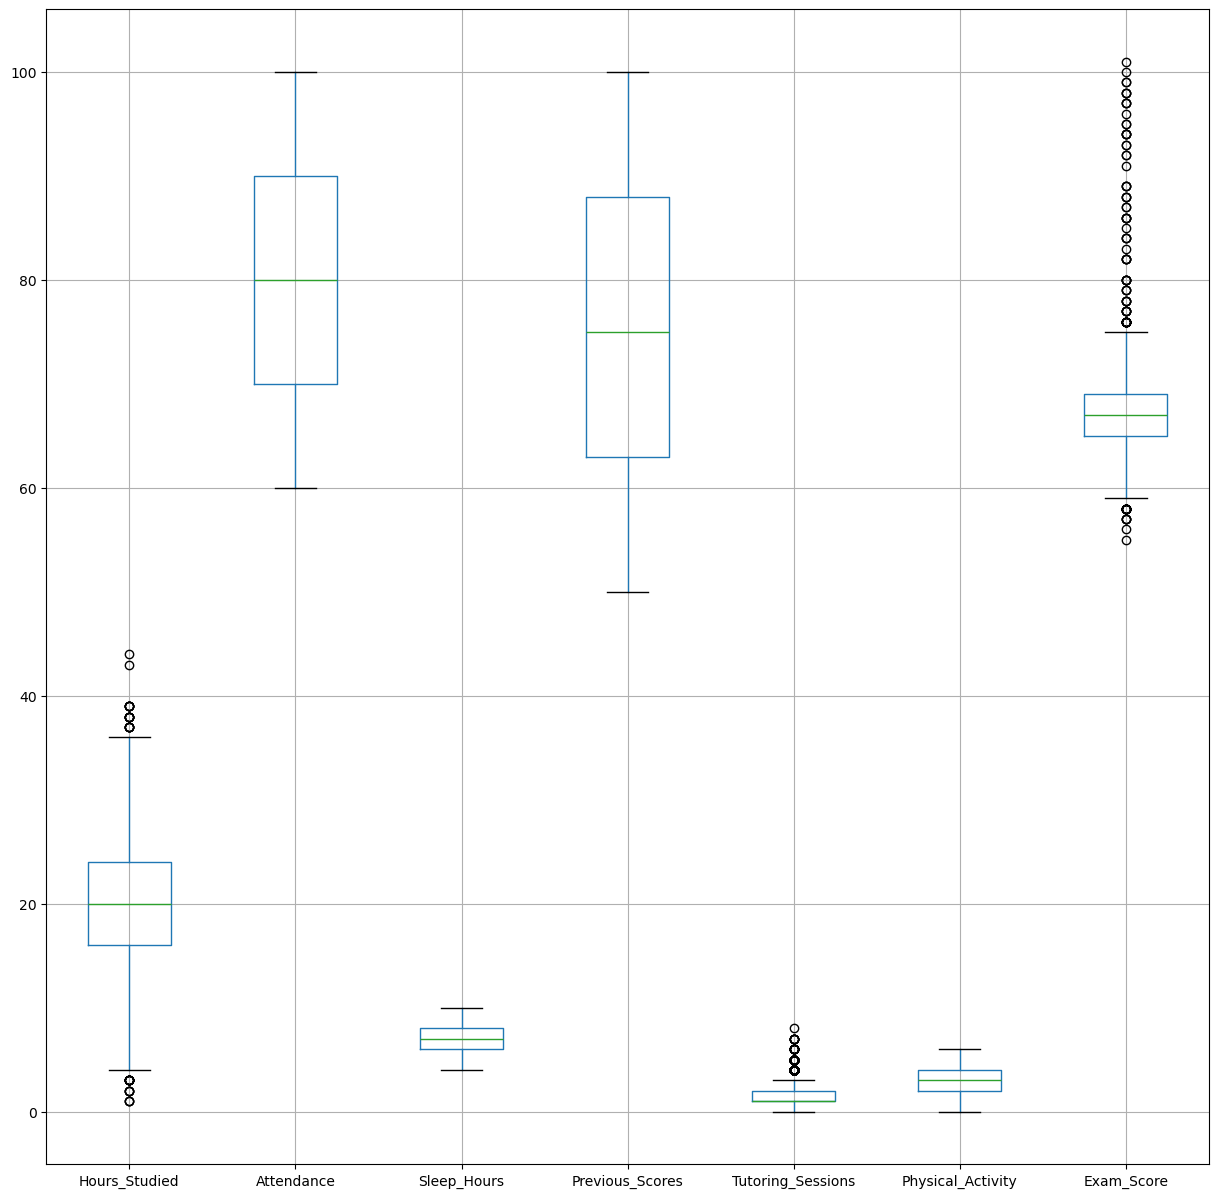

In [12]:
#checking for outliers
plt.figure(figsize=(15, 15))
Student_Performance.boxplot()
plt.show()

# Data Insights

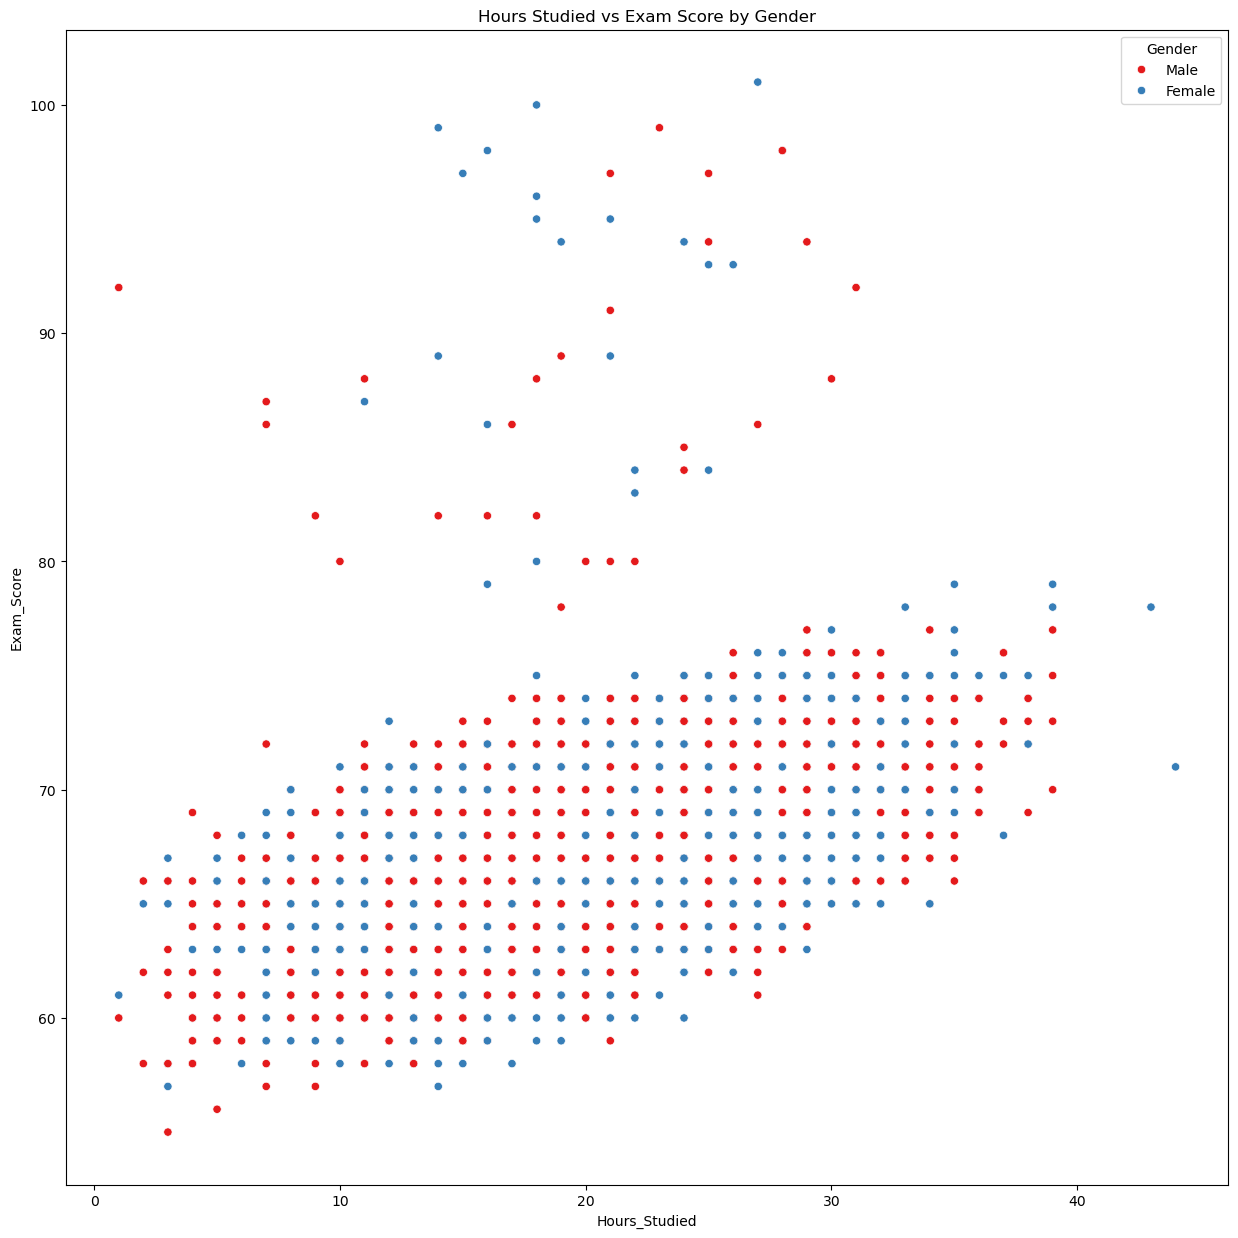

In [13]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Gender', data=Student_Performance, palette='Set1')
plt.title('Hours Studied vs Exam Score by Gender')
plt.show()

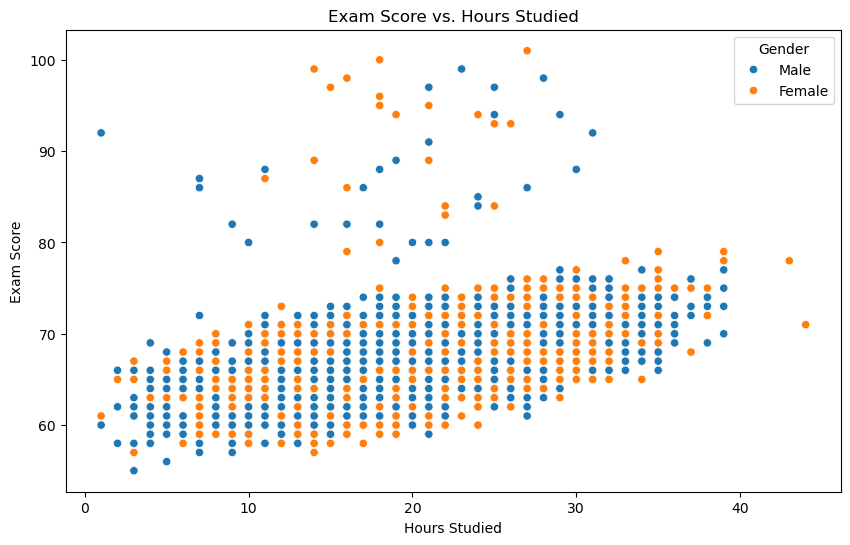

In [14]:
# Scatter plot with regression line for Hours_Studied vs Exam_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score',hue='Gender', data=Student_Performance)
plt.title('Exam Score vs. Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

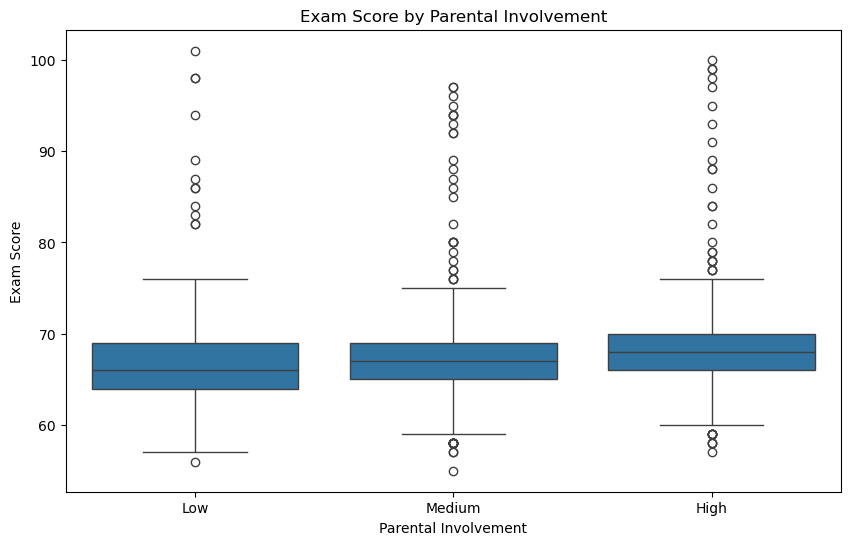

In [15]:
# Box plot for Parental_Involvement vs Exam_Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=Student_Performance, order=['Low', 'Medium', 'High'])
plt.title('Exam Score by Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()

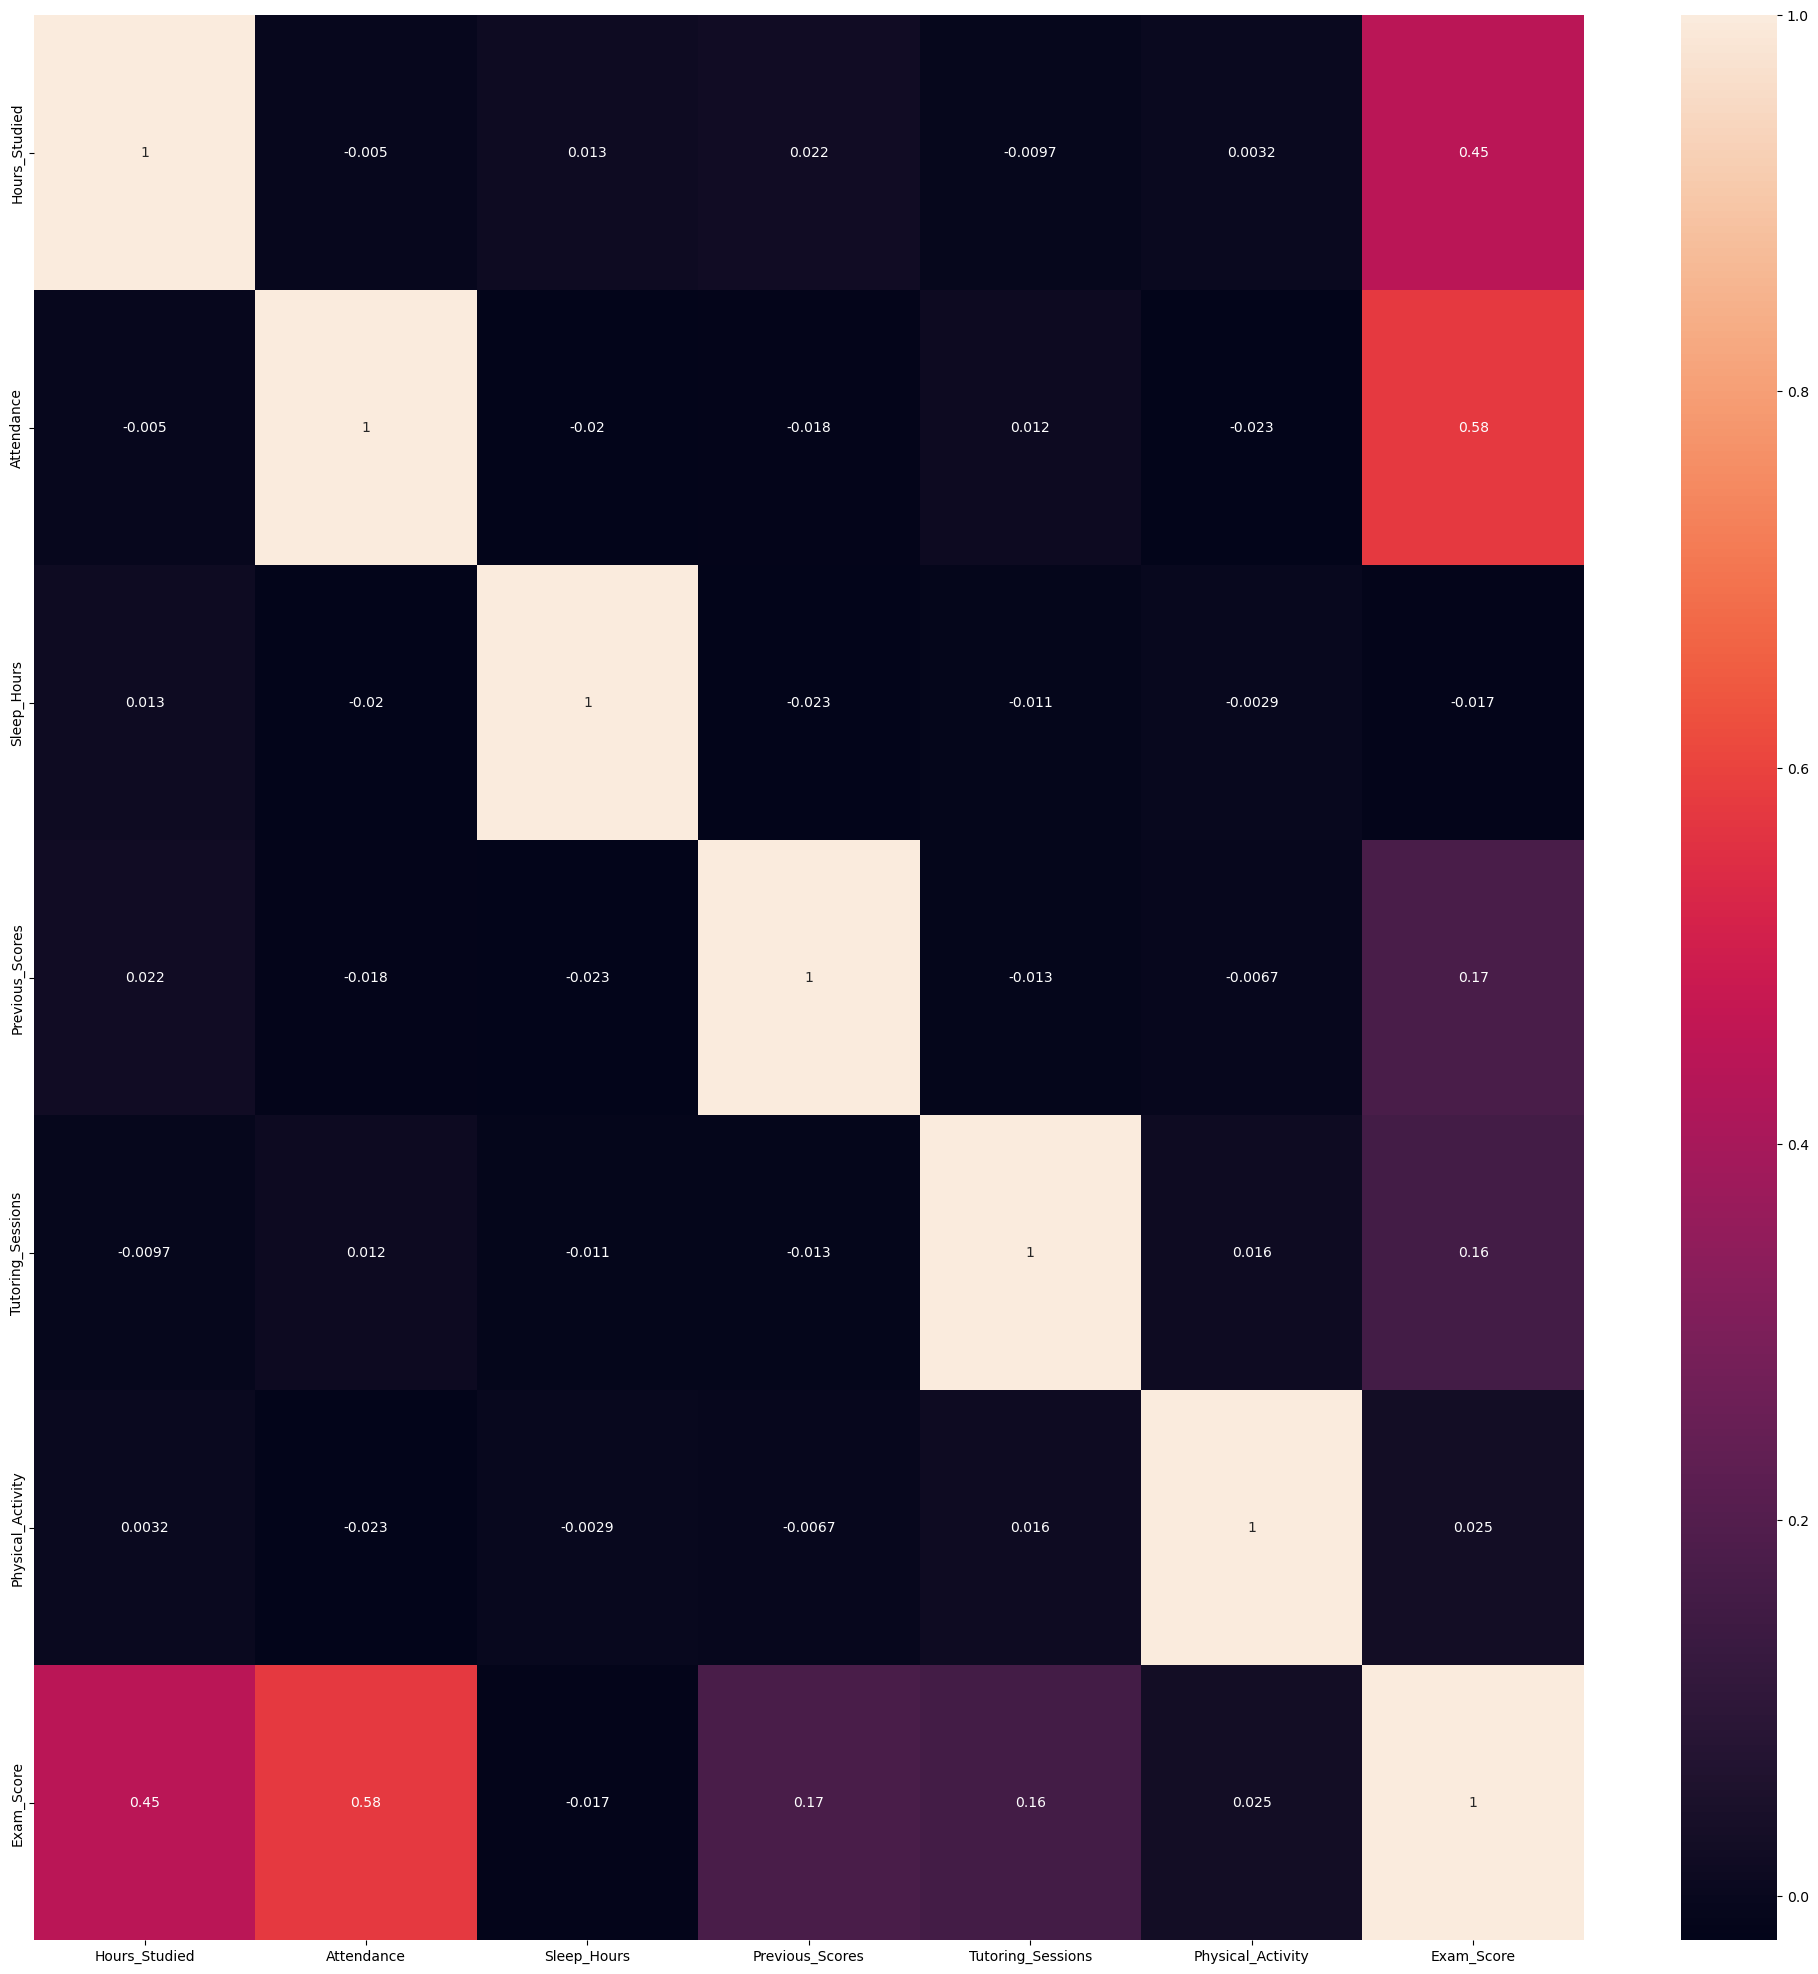

In [16]:
numerical_data = Student_Performance.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(25,25))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

# Data PreProcessing

### Converting Categorical data to numeical

In [17]:
categorical_columns = Student_Performance.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


In [18]:
for column in categorical_columns:
    unique_values = Student_Performance[column].unique()
    print(f" '{column}' contains: {unique_values}")

 'Parental_Involvement' contains: ['Low' 'Medium' 'High']
 'Access_to_Resources' contains: ['High' 'Medium' 'Low']
 'Extracurricular_Activities' contains: ['No' 'Yes']
 'Motivation_Level' contains: ['Low' 'Medium' 'High']
 'Internet_Access' contains: ['Yes' 'No']
 'Family_Income' contains: ['Low' 'Medium' 'High']
 'Teacher_Quality' contains: ['Medium' 'High' 'Low']
 'School_Type' contains: ['Public' 'Private']
 'Peer_Influence' contains: ['Positive' 'Negative' 'Neutral']
 'Learning_Disabilities' contains: ['No' 'Yes']
 'Parental_Education_Level' contains: ['High School' 'College' 'Postgraduate']
 'Distance_from_Home' contains: ['Near' 'Moderate' 'Far']
 'Gender' contains: ['Male' 'Female']


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [20]:
for col in categorical_columns:
    Student_Performance[col] = label_encoder.fit_transform(Student_Performance[col])

In [21]:
Student_Performance.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [22]:
Student_Performance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int32
 3   Access_to_Resources         6378 non-null   int32
 4   Extracurricular_Activities  6378 non-null   int32
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int32
 8   Internet_Access             6378 non-null   int32
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int32
 11  Teacher_Quality             6378 non-null   int32
 12  School_Type                 6378 non-null   int32
 13  Peer_Influence              6378 non-null   int32
 14  Physical_Acti

# Splitting the Data

In [23]:
from sklearn.model_selection import train_test_split

In [54]:
X = Student_Performance.drop(columns=['Exam_Score'])
y = Student_Performance['Exam_Score']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

# Training the Model

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = reg.predict(X_test)

# Model Evaluation

In [59]:
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
r2_score(y_test, y_pred)

0.6159604766592621

In [31]:
y_train_pred = reg.predict(X_train)
r2_score(y_train, y_train_pred) #To check if model is over/under fitting

0.654663388317775

# Visualizing the Predictions

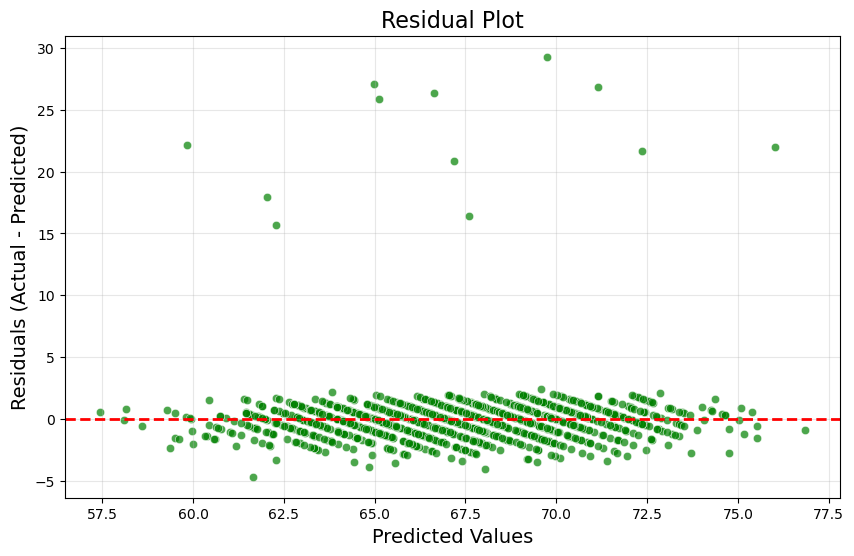

In [32]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

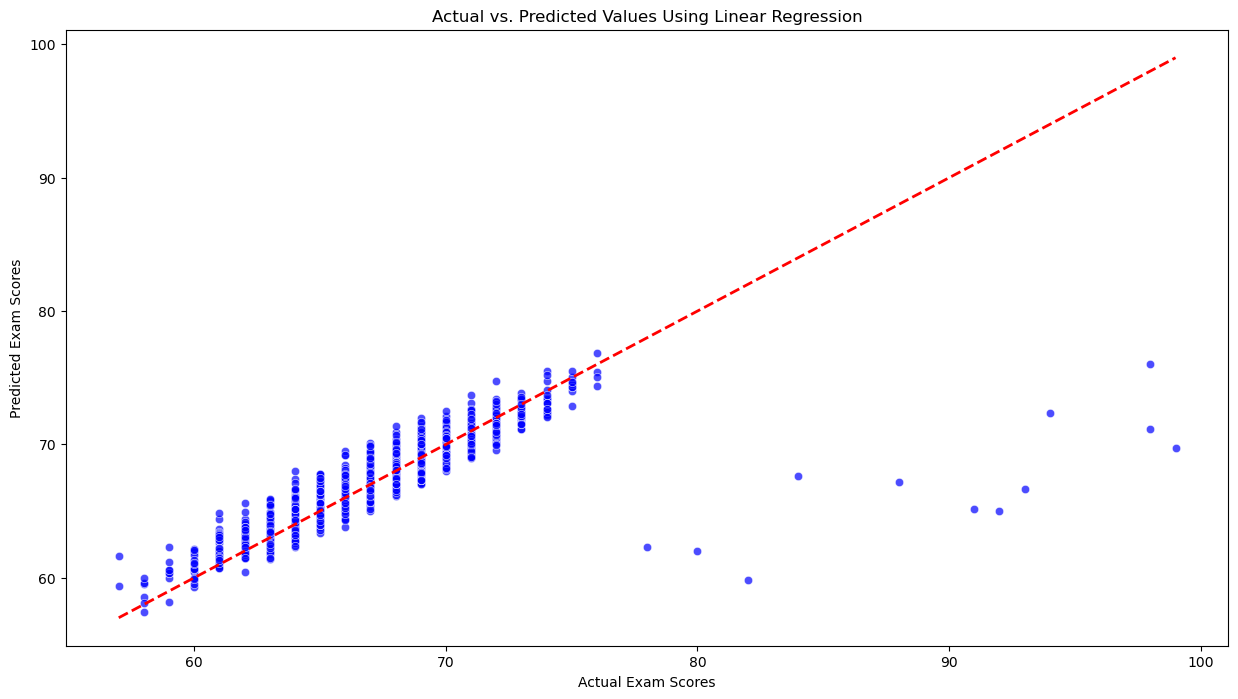

In [33]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.title('Actual vs. Predicted Values Using Linear Regression')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.show()

# Testing the Polynomial Regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_predictions = poly_model.predict(X_test_poly)
poly_r2 = r2_score(y_test, poly_predictions)
print("Performance of Polynomial Regression(degree=2):")
print(f"Test R²: {poly_r2:.4f}")

Performance of Polynomial Regression(degree=2):
Test R²: 0.6862


In [35]:
poly3_features = PolynomialFeatures(degree=3)
X_train_poly3 = poly3_features.fit_transform(X_train) 
X_test_poly3 = poly3_features.transform(X_test)
poly3_model = LinearRegression()
poly3_model.fit(X_train_poly3, y_train)
poly3_predictions = poly3_model.predict(X_test_poly3)
poly3_r2 = r2_score(y_test, poly3_predictions)
print("\nPerformance of Polynomial Regression(degree=3):")
print(f"Test R²: {poly3_r2:.4f}")


Performance of Polynomial Regression(degree=3):
Test R²: 0.5683


# Testing with the highly correlated features; Hours_Studied and Attendance

In [36]:
X_Selected= Student_Performance[['Hours_Studied','Attendance']]
y= Student_Performance['Exam_Score']

In [37]:
X_trainS,X_testS,y_train,y_test = train_test_split(X_Selected,y,test_size=0.2,random_state=100)

In [38]:
reg2 = LinearRegression()
reg2.fit(X_trainS, y_train)

LinearRegression()

In [39]:
y_pred = reg2.predict(X_testS)

In [40]:
r2_score(y_test, y_pred)

0.5283173204909202